In [1]:
import pandas as pd
import numpy as np

In [2]:
csv_data = pd.read_csv("appUsageData.csv")
csv_data.head()

,Nov-17,3.20 PM,com.android.documentsui,0
0,Nov-17,3.21 PM,com.android.settings,3
1,Nov-17,3.15 PM,com.whatsapp,63
2,NaN,NaN,NaN,0
3,Nov-17,4.20 PM,in.amazon.mShop.android.shopping,12
4,Nov-17,4.20 PM,com.android.documentsui,26


In [3]:
csv_data = csv_data.dropna(axis = 0)
csv_data.reset_index(drop = True, inplace=True)
csv_data.head()

,Nov-17,3.20 PM,com.android.documentsui,0
0,Nov-17,3.21 PM,com.android.settings,3
1,Nov-17,3.15 PM,com.whatsapp,63
2,Nov-17,4.20 PM,in.amazon.mShop.android.shopping,12
3,Nov-17,4.20 PM,com.android.documentsui,26
4,Nov-17,4.19 PM,com.whatsapp,191


In [4]:
csv_data.columns = ["Date", "Time", "PackageName", "SecondsActive"]
print("Shape", csv_data.shape)
packageCount = csv_data.PackageName.value_counts()
print("Unique packages", packageCount.count(), end="\n\n")
print("Package - Launch count\n", packageCount, end="\n\n")
packageList = csv_data.PackageName.unique()
print(packageList)
csv_data.head()

Shape (422, 4)
Unique packages 39

Package - Launch count
 com.whatsapp                                   164
com.linkedin.android                            38
com.android.dialer                              25
com.android.chrome                              21
com.google.android.googlequicksearchbox         20
com.truecaller                                  16
com.reddit.frontpage                            16
com.android.vending                             13
com.android.settings                            13
org.telegram.messenger                          13
com.google.android.gm                           12
com.brave.browser_nightly                       12
com.google.android.apps.docs                     6
com.google.android.apps.meetings                 6
com.android.messaging                            5
com.android.documentsui                          5
com.google.android.youtube                       4
com.google.android.contacts                      4
uk.co.nickfines.RealCal

,Date,Time,PackageName,SecondsActive
0,Nov-17,3.21 PM,com.android.settings,3
1,Nov-17,3.15 PM,com.whatsapp,63
2,Nov-17,4.20 PM,in.amazon.mShop.android.shopping,12
3,Nov-17,4.20 PM,com.android.documentsui,26
4,Nov-17,4.19 PM,com.whatsapp,191


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [12]:
date = csv_data.iloc[:,0]
first_date = int(date[0].split('-')[1])-1
last_day = 0
month_change = False
def getNum(string):
    day = 0
    global last_day
    global month_change
    if (int(string.split('-')[1]) > first_date) and not month_change:
        day = int(string.split('-')[1])-first_date
        last_day = day
    else:
        month_change = True
        day = int(string.split('-')[1]) + last_day
        
    return day
date = map(getNum, date)
date = list(date)

time = csv_data.iloc[:,1]
getHours = lambda string : float(string.split(' ')[0].replace(':', '.')) if string.split(' ')[1] == "AM" else float(string.split(' ')[0].replace(':', '.'))+12
updateDate = []
time = map(getHours, time)
time = list(time)
print(date[:5])
print(time[:5])

print(len(date), len(time))

allPackageList = csv_data.iloc[:,2]
print(allPackageList[:5])
colors = []
packageColorDict = {}
baseColor = 255/len(packageList)
newColor = baseColor
colorDict = {}
for package in packageList:
    if int(newColor) in colorDict:
        newColor = newColor + random.randint(10, 50)
        colorDict[newColor]
    colors.append(int(newColor))
    packageColorDict[package] = newColor
    newColor += baseColor

allColorList = []
for package in allPackageList:
    allColorList.append(int(packageColorDict[package]))
    
print(packageColorDict, colors)

[1, 1, 1, 1, 1]
[15.21, 15.15, 16.2, 16.2, 16.19]
422 422
0                com.android.settings
1                        com.whatsapp
2    in.amazon.mShop.android.shopping
3             com.android.documentsui
4                        com.whatsapp
Name: PackageName, dtype: object
{'com.android.settings': 6.538461538461538, 'com.whatsapp': 13.076923076923077, 'in.amazon.mShop.android.shopping': 19.615384615384613, 'com.android.documentsui': 26.153846153846153, 'com.google.android.gm': 32.69230769230769, 'com.reddit.frontpage': 39.23076923076923, 'com.android.calculator2': 45.769230769230774, 'com.google.android.googlequicksearchbox': 52.307692307692314, 'com.google.android.apps.docs.editors.sheets': 58.846153846153854, 'com.brave.browser_nightly': 65.38461538461539, 'com.google.android.GoogleCamera': 71.92307692307692, 'com.android.messaging': 78.46153846153845, 'com.android.dialer': 84.99999999999999, 'com.linkedin.android': 91.53846153846152, 'com.aospextended.aexpapers': 98.076923076

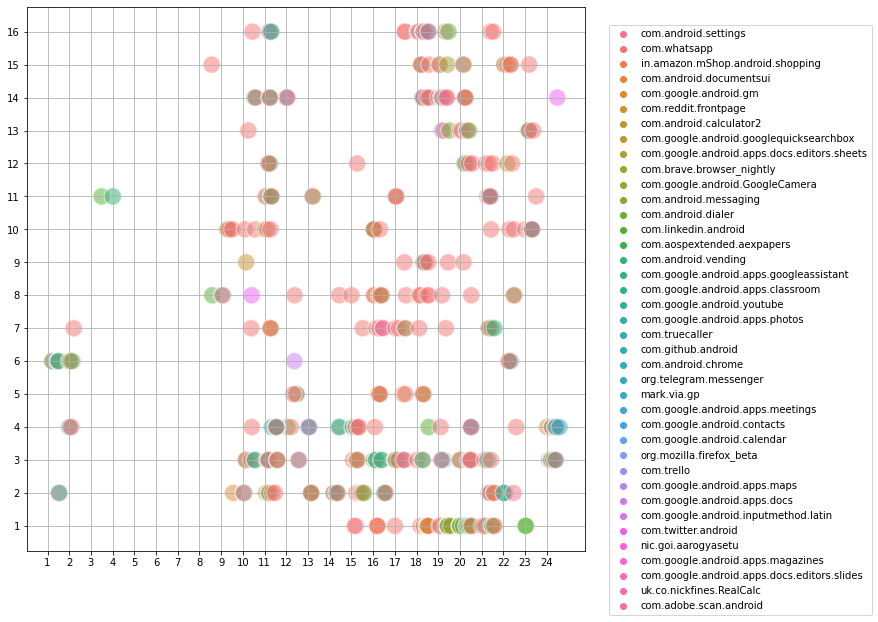

In [13]:
#time - x
#date - y
#for i in range(0, len(date), 1):
    #colors.append(packageColorDict[allPackageList[i]])
area = (300 * np.ones(len(date)))
plt.figure(figsize=(10, 10))
plt.yticks(range(date[0], date[0]+len(date)))
plt.xticks(range(1, 25))
sns.scatterplot(x = time, y = date, s = area, alpha = 0.5, hue = allPackageList, c = allColorList) #Use palette = Spectral for more clarity
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=1.8)
plt.grid(True)
plt.show()

In [14]:
packageList

array(['com.android.settings', 'com.whatsapp',
       'in.amazon.mShop.android.shopping', 'com.android.documentsui',
       'com.google.android.gm', 'com.reddit.frontpage',
       'com.android.calculator2',
       'com.google.android.googlequicksearchbox',
       'com.google.android.apps.docs.editors.sheets',
       'com.brave.browser_nightly', 'com.google.android.GoogleCamera',
       'com.android.messaging', 'com.android.dialer',
       'com.linkedin.android', 'com.aospextended.aexpapers',
       'com.android.vending', 'com.google.android.apps.googleassistant',
       'com.google.android.apps.classroom', 'com.google.android.youtube',
       'com.google.android.apps.photos', 'com.truecaller',
       'com.github.android', 'com.android.chrome',
       'org.telegram.messenger', 'mark.via.gp',
       'com.google.android.apps.meetings', 'com.google.android.contacts',
       'com.google.android.calendar', 'org.mozilla.firefox_beta',
       'com.trello', 'com.google.android.apps.maps',
     

In [15]:
def write_dataset(data):
    try:
        file = open("Data_for_Model.csv", "w")
        file.write(data)
        file.close()
        return 0
    except Exception as e:
        print(e)
        return -1

In [37]:
import datetime
prev_app = "NA"
data_to_write = "Day,Time,PreviousApp,Used\n"
year = '2020'
appUsed = 1
time_to_package = {}
packageDetails = {} #Key is PackageName + Time
for row_no in range(0, csv_data.shape[0], 1):
    _row = csv_data.iloc[row_no, :]
    current_app = _row['PackageName']
    #Ref: https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
    #Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
    day_of_week = datetime.datetime.strptime(_row['Date'] + ' ' + year, "%b-%d %Y").strftime('%w')
    time_of_day = _row['Time'].split(' ')[0].split('.')
    hour_of_launch = int(time_of_day[0])
    minutes_of_launch = int(time_of_day[1])
    
    if(minutes_of_launch >= 0 and minutes_of_launch < 15):
        minutes_of_launch = 0
    elif(minutes_of_launch >= 15 and minutes_of_launch < 30):
        minutes_of_launch = 15
    elif(minutes_of_launch >= 30 and minutes_of_launch < 45):
        minutes_of_launch = 30
    elif(minutes_of_launch < 60):
        minutes_of_launch = 45
    else:
        minutes_of_launch = 0
        
    time_of_day = str(hour_of_launch) + '.' + str(minutes_of_launch)
    if time_of_day in time_to_package:
        time_to_package[time_of_day].add(current_app)
    else:
        time_to_package[time_of_day] = {current_app}
    packageDetails[current_app+time_of_day] = [day_of_week, time_of_day, prev_app, current_app, appUsed]
    prev_app = current_app
    
print(time_to_package, packageDetails)

{'3.15': {'com.whatsapp', 'com.linkedin.android', 'com.android.settings', 'com.android.dialer', 'com.google.android.contacts'}, '4.15': {'com.android.documentsui', 'com.whatsapp', 'com.linkedin.android', 'com.reddit.frontpage', 'in.amazon.mShop.android.shopping'}, '5.0': {'com.whatsapp', 'com.linkedin.android', 'com.android.settings', 'com.android.dialer', 'com.android.messaging'}, '6.15': {'com.whatsapp', 'com.android.dialer', 'uk.co.nickfines.RealCalc', 'com.google.android.apps.meetings', 'com.android.messaging', 'com.android.chrome', 'com.google.android.contacts', 'com.google.android.googlequicksearchbox'}, '6.30': {'com.whatsapp', 'com.google.android.gm', 'com.android.settings', 'com.android.dialer', 'com.google.android.apps.meetings', 'com.google.android.apps.docs', 'com.reddit.frontpage', 'org.telegram.messenger', 'com.android.vending', 'com.truecaller', 'com.android.chrome'}, '6.45': {'com.android.documentsui', 'com.whatsapp', 'com.linkedin.android', 'com.google.android.gm', 'co